# Hausarbeit im Modul „Data Science und Machine Learning“ WS22/23 - Teil 1

## Data cleaning

In [1]:
import pandas as pd

finTechDF = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/VAWi-DataScience/Data-Science-and-Machine-Learning/main/Assignment/WiSe22_23/01_FinTech_Churn.csv', sep=";"))

In [2]:
finTechDF

,CCreditScore,CGeography,CGender,CAge,CTenure,CBalance,CNumOfProducts,CHasCrCard,CIsActiveMember,CEstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
print(finTechDF.dtypes)

CCreditScore          int64
CGeography           object
CGender              object
CAge                  int64
CTenure               int64
CBalance            float64
CNumOfProducts        int64
CHasCrCard            int64
CIsActiveMember       int64
CEstimatedSalary     object
Churn                 int64
dtype: object


In [4]:
finTechDF['CEstimatedSalary'] = pd.to_numeric(finTechDF['CEstimatedSalary'], errors='coerce')
finTechDF.isna().sum()

CCreditScore        0
CGeography          0
CGender             0
CAge                0
CTenure             0
CBalance            0
CNumOfProducts      0
CHasCrCard          0
CIsActiveMember     0
CEstimatedSalary    1
Churn               0
dtype: int64

In [5]:
finTechDF.dropna()
finTechDF.dtypes

CCreditScore          int64
CGeography           object
CGender              object
CAge                  int64
CTenure               int64
CBalance            float64
CNumOfProducts        int64
CHasCrCard            int64
CIsActiveMember       int64
CEstimatedSalary    float64
Churn                 int64
dtype: object

In [6]:
finTechDF = pd.get_dummies(finTechDF, columns=['CGeography'], dtype='int64')
finTechDF = pd.get_dummies(finTechDF, columns=['CGender'], dtype='int64')
finTechDF

,CCreditScore,CAge,CTenure,CBalance,CNumOfProducts,CHasCrCard,CIsActiveMember,CEstimatedSalary,Churn,CGeography_France,CGeography_Germany,CGeography_Spain,CGender_Female,CGender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


## 1. Apply three different simple machine learning models, which we discussed in lecture 02. Describe your approach, interpret the performance, and justify (based on the results) which machine learning model you would choose.

In [7]:
import numpy as np
#Spliting dataset in two parts: feature set and target label
finTechDF = finTechDF.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X = finTechDF.drop('Churn', axis=1)
y = finTechDF['Churn']


In [8]:
# Partition data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Import Decision Tree model
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree classifier object
clf_tree = DecisionTreeClassifier(random_state=42, min_samples_leaf = 0.04)

# Train the model using training dataset
clf_tree = clf_tree.fit(X_train,y_train)


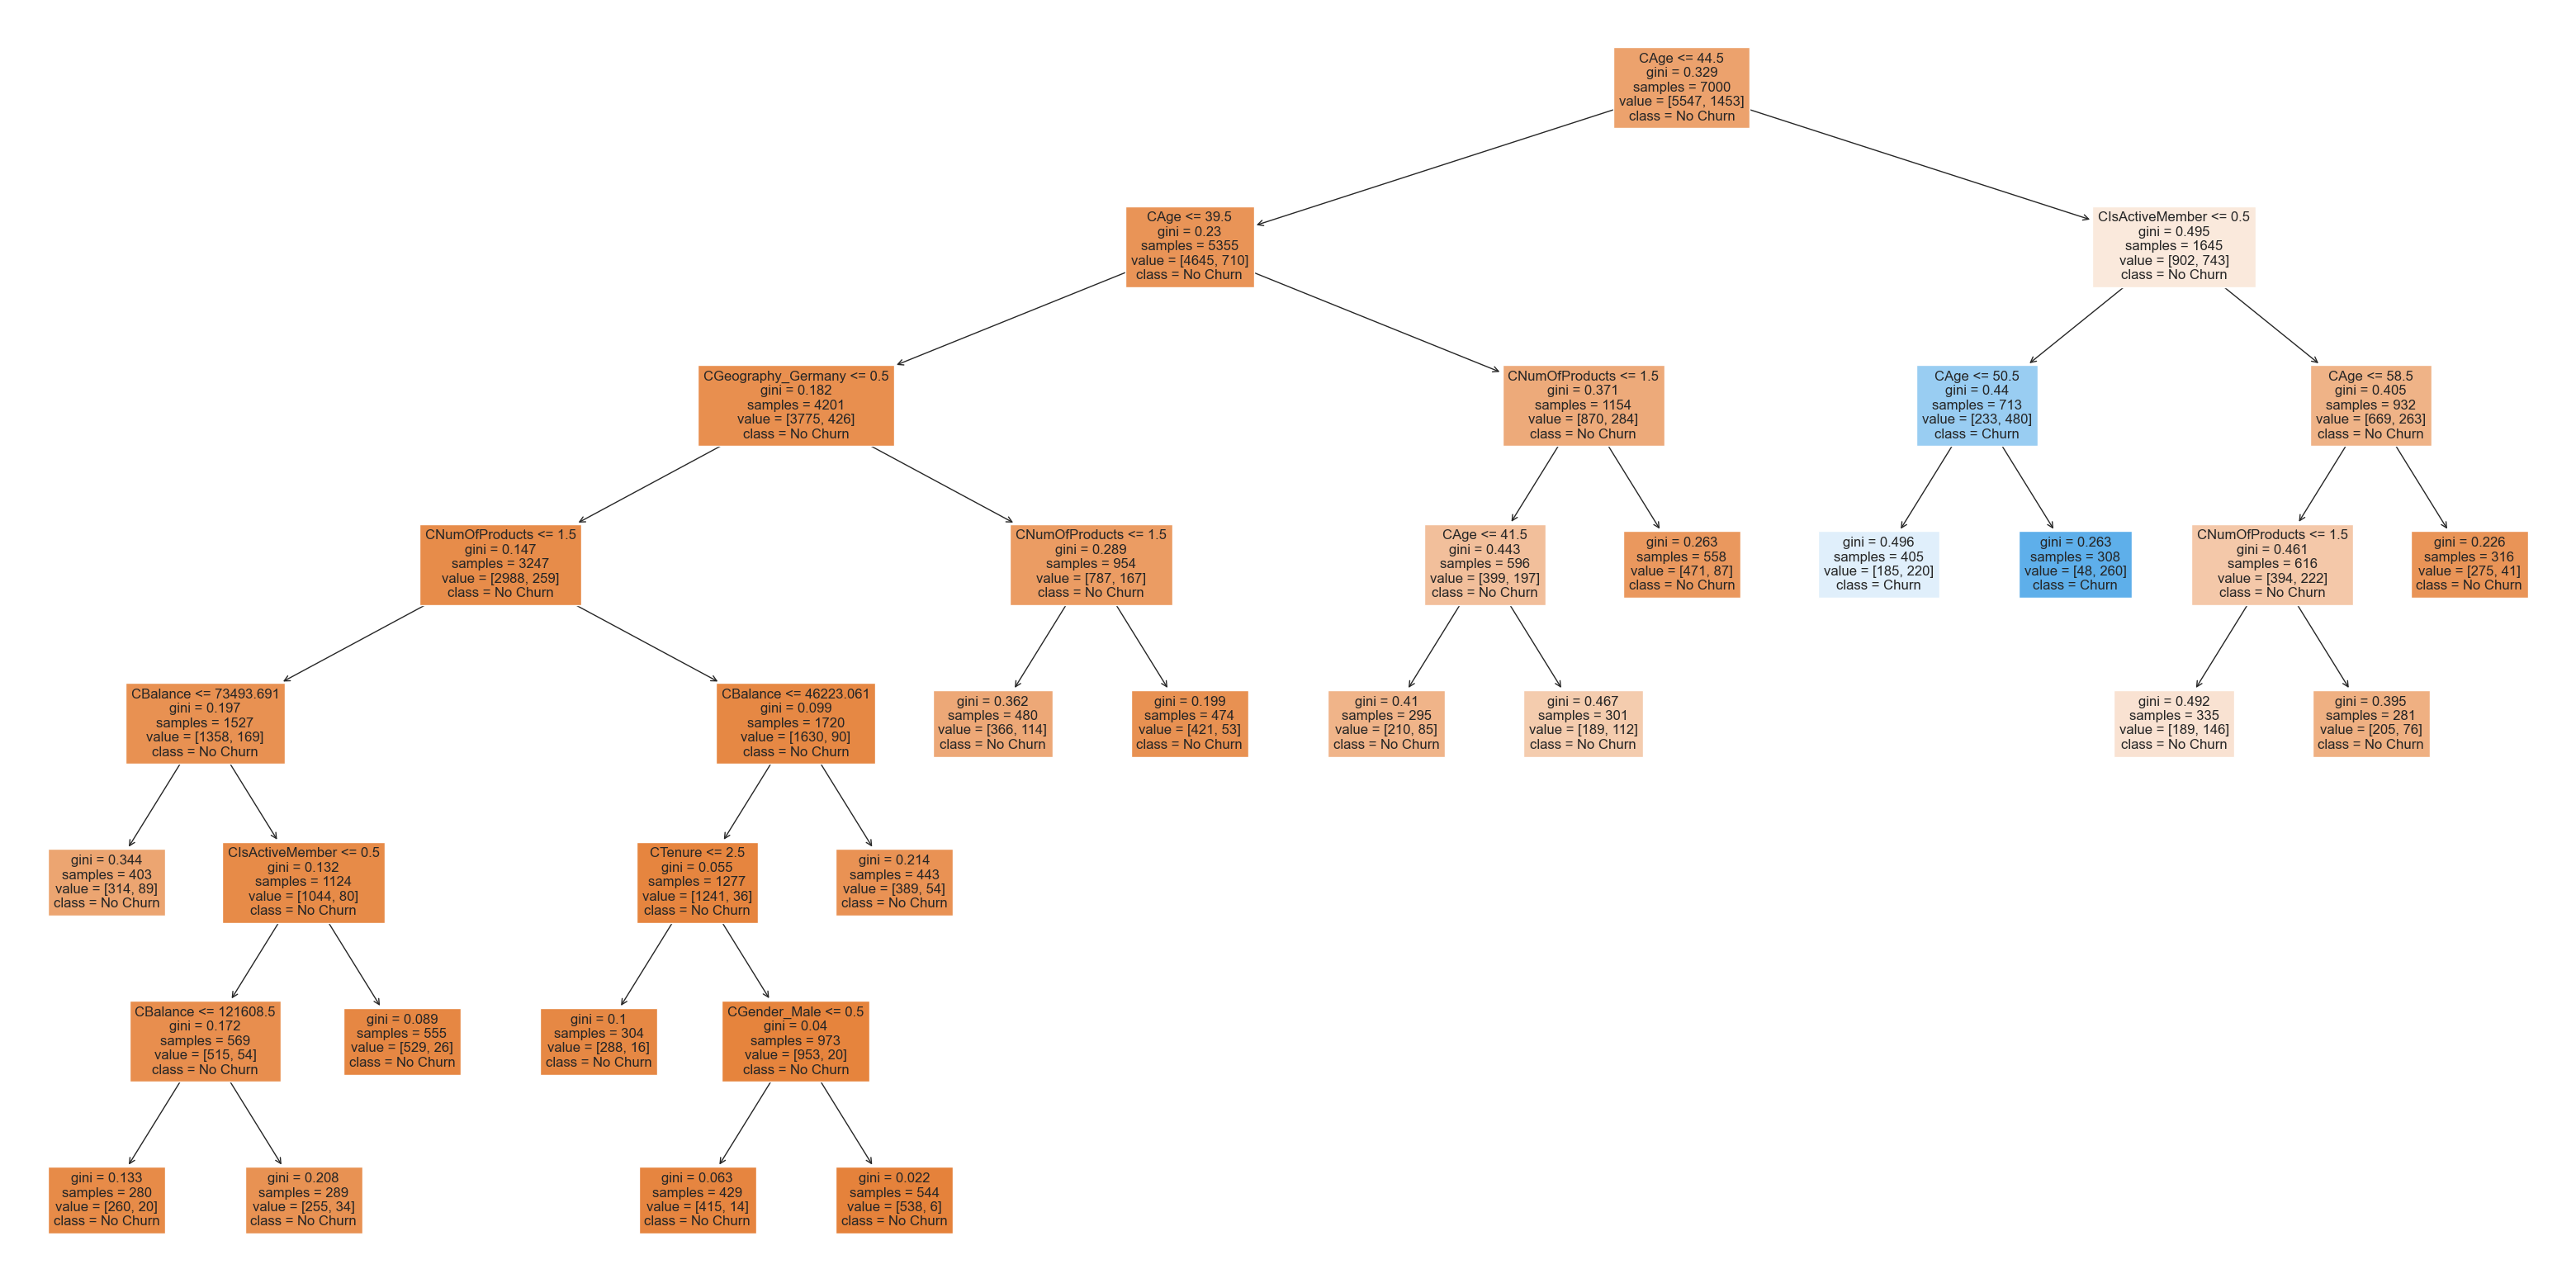

In [10]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(clf_tree,feature_names = X_train.columns, filled=True, class_names= ["No Churn","Churn"])
plt.show()

In [11]:
# Predict the response for training dataset
y_pred_train = clf_tree.predict(X_train)
# Predict the response for test dataset
y_pred_test = clf_tree.predict(X_test)

In [12]:
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# Calculate model accuracy
print("Accuracy:",accuracy_score(y_test, y_pred_test))
# Calculate model precision
print("Precision:",precision_score(y_test, y_pred_test))
# Calculate model recall
print("Recall:",recall_score(y_test, y_pred_test))
# Calculate model f1 score
print("F1-Score:",f1_score(y_test, y_pred_test))

Accuracy: 0.8376666666666667
Precision: 0.6678200692041523
Recall: 0.3304794520547945
F1-Score: 0.4421534936998855


## Confusion matrix (training data)

C:\Users\Flori\anaconda3\envs\DaScML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


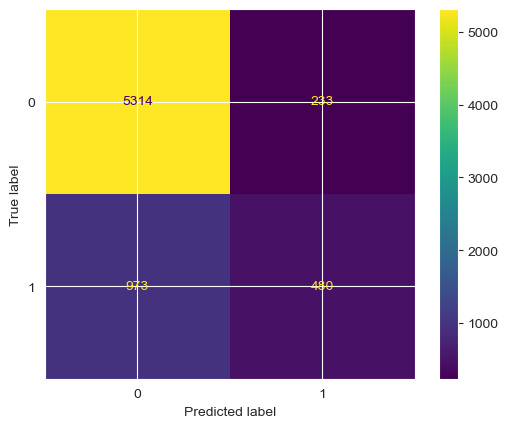

In [14]:
# Import the confusion matrix
from sklearn.metrics import plot_confusion_matrix

# Plot Confusion matrix
plot_confusion_matrix(clf_tree , X_train, y_train, values_format='d')

In [15]:
import numpy as np
# Predict the response for training dataset
np.sum(np.equal(y_train, y_pred_train)) / len(y_train)

0.8277142857142857